# Creating Aliens
What we will do is to first create a single alien in the top-left corner. Then use the spacing around the first alien and the overall screen size to determine how many aliens can fit on the screen. Then fill the upper part of the screen with aliens. Finally we will code to make the fleet move. 



### Creating the first alien
First of all you will have to download *alien.png* and put it in the images folder in your main directory.  Now we will create the alien class. Since many of the aliens are to be managed together we will be using **sprites**. Create a file alien.py with the following code:

In [ ]:
import pygame
from pygame.sprite import Sprite

class Alien(Sprite):
  """A class to represent a single alien in the fleet."""
  def __init__(self, ai_settings, screen):
    """Initialize the alien and set its starting position."""
    super().__init__()
    self.screen = screen
    self.ai_settings = ai_settings

    # Load the alien image and set its rect attribute.
    self.image = pygame.image.load('images/alien.png')
    self.rect = self.image.get_rect()

    # Start each new alien near the top left of the screen.
    self.rect.x = self.rect.width
    self.rect.y = self.rect.height

  def blitme(self):
    """Draw the alien at its current location."""
    self.screen.blit(self.image, self.rect)


We have defined the **Alien** classin quite the similar way to bullets and ship. It inherits from the **Sprite** class. We use the`super()` method to connect the two classes. The rest of the code in the `__init__` is to load the image and then position it at the top left corner. `__blitme__` is defined to draw the alien on the screen in a similar way to the ship.

Now we create an instance of Alien in *alien_invasion.py*:


In [ ]:
--snip--
from ship import Ship
from alien import Alien
import game_functions as gf

def run_game():
  --snip--
  # Make an alien.
  alien = Alien(ai_settings, screen)

  # Start the main loop for the game.
  while True:
    gf.check_events(ai_settings, screen, ship, bullets)
    ship.update()
    gf.update_bullets(bullets)
    gf.update_screen(bg_img, screen, ship, alien, bullets)
    
run_game()


We import the alien class and create an instance of it outside the *while loop* (we don't need to create a new alien in each pass). We also have to pass the alien instance in `update_screen()` so that it can be drawn on the screen in each pass. We now modify `update_screen()` function in *game_functions.py* for this.

In [ ]:
def update_screen(bg_img, screen, ship, alien, bullets):
  --snip--
  # Redraw all bullets behind ship and aliens.
  for bullet in bullets:
    bullet.draw_bullet()
  ship.blitme()
  alien.blitme()

  # Make the most recently drawn screen visible.
  pygame.display.flip()


`alien.blitme` is added to redraw the alien. If you will run *alien_invasion.py* you can see the first alien nicely placed. 

### Making the alien fleet
To draw a fleet, we need to figure out how many aliens can fit across the screen and how many rows of aliens can fit down the screen.

The screen width is stored in `ai_settings.screen_width`, but we
need an empty margin on either side of the screen. We’ll make this margin the width of one alien so our avaialble space will be:
```
available_space_x = ai_settings.screen_width – (2 * alien_width)
```
We also need to set the spacing between aliens; we’ll make it one alien width. The space needed to display one alien is twice its width: one width for the alien and one width for the empty space to its right. No. of aliens that will fit be:
```
number_aliens_x = available_space_x / (2 * alien_width)
```



Finally to create the row, first create an empty group called aliens in *alien_invasion.py* to hold all of our aliens(quite similar to the bullets), and then call a function in game_functions.py to create a fleet:


In [ ]:
import pygame
from pygame.sprite import Group
from settings import Settings
from ship import Ship
import game_functions as gf

def run_game():
  --snip--
  # Make a ship, a group of bullets, and a group of aliens.
  ship = Ship(ai_settings, screen)
  bullets = Group()

  aliens = Group()

  # Create the fleet of aliens.
  gf.create_fleet(ai_settings, screen, aliens)

  # Start the main loop for the game.
  while True:
    --snip—
    gf.update_screen(bg_img, screen, ship, aliens, bullets)

run_game()


We created an empty group to hold all of the aliens in the game. Then, we call this new function `create_fleet()`, which we’ll write shortly, and pass it the *ai_settings, the screen object, and the empty group aliens*. We also modify the call to `update_screen()` to give it access to the group aliens. 

`update_screen()` in *game_functions.py* will have to be modified like this:

In [ ]:
def update_screen(bg_img, screen, ship, aliens, bullets):
  --snip--
  ship.blitme()
  aliens.draw(screen)
  
  # Make the most recently drawn screen visible.
  pygame.display.flip()


We also need to add the function `create_fleet()` in *game_functions.py*

In [ ]:
--snip--
from bullet import Bullet
from alien import Alien
--snip--


def create_fleet(ai_settings, screen, aliens):
  """Create a full fleet of aliens."""
  # Create an alien and find the number of aliens in a row.
  # Spacing between each alien is equal to one alien width.
  alien = Alien(ai_settings, screen) #create an alien object just for calculations
  alien_width = alien.rect.width #get its width

  # Calculate no. of aliens that will fill the row
  available_space_x = ai_settings.screen_width - 2 * alien_width
  number_aliens_x = int(available_space_x / (2 * alien_width)) # we use int to ensure we get an integer no. of aliens by rounding down

  # Create the first row of aliens.
  for alien_number in range(number_aliens_x):
    # Create an alien and place it in the row.
    alien = Alien(ai_settings, screen)
    alien.rect.x = alien_width + 2 * alien_width * alien_number
    aliens.add(alien)


We have already thought out most of the working of this code. Using the calculations we did above we calculate the number of aliens needed to fill the row. Then we use a for loop to create those many no. of aliens. With each iteration we keep shifting by 2 times **alien_width** to the right (for the width of alien followed by the gap) 

When you now run Alien Invasion, you should see the first row of aliens appear.

Since we have to add code for making further rows of aliens in `create_fleet` it makes sense to *refactor* it before moving ahead. We add two more fucntions `get_number_aliens_x()` and `create_alien()` and modify `create_fleet()` accordingly.

In [ ]:
def get_number_aliens_x(ai_settings, alien_width):	
  """Determine the number of aliens that fit in a row."""
  available_space_x = ai_settings.screen_width - 2 * alien_width
  number_aliens_x = int(available_space_x / (2 * alien_width))
  return number_aliens_x

def create_alien(ai_settings, screen, aliens, alien_number):
  """Create an alien and place it in the row."""
  alien = Alien(ai_settings, screen)
  alien_width = alien.rect.width
  alien.rect.x = alien_width + 2 * alien_width * alien_number
  aliens.add(alien)

def create_fleet(ai_settings, screen, aliens):
  """Create a full fleet of aliens."""
  # Create an alien and find the number of aliens in a row.
  alien = Alien(ai_settings, screen) #Create an alien object just for calculations
  number_aliens_x = get_number_aliens_x(ai_settings, alien.rect.width)

  # Create the first row of aliens.
  for alien_number in range(number_aliens_x):
    create_alien(ai_settings, screen, aliens, alien_number)


The code is pretty much the same except that now we have shifted the code for calculating the number of aliens to `get_num_aliens_x()` and the code for creating each alien and adding it to the group **aliens** to the function `create_alien()`

Now, to determine the number of rows, we find the available vertical
space by subtracting the ship height from the bottom and 3 alien heights( 2 for space between ship and the fleet and 1 more since its the topleft corner).
```
available_space_y = ai_settings.screen_height – 3 * alien_height – ship_height
```
Each row also needs some empty space below it, which we’ll make equal to the height of one alien. To find the number of rows, we divide the available space by two times the height of an alien.
```
number_rows = available_height_y / (2 * alien_height)
```

Now we code this logic in the function `get_number_rows()` which after doing the above caluclation returns the number of rows of aliens we need to make. We also have modified  the `create_alien()` function to now speciffy the alien's y coordinate as well. We have to modify `create_fleet()` function as well. Since we need the ship's height we have to pass the ship object in `create_fleet()` as well.

In [ ]:
def get_number_rows(ai_settings, ship_height, alien_height):	
  """Determine the number of rows of aliens that fit on the screen."""

  available_space_y = (ai_settings.screen_height - (3 * alien_height) - ship_height)
  number_rows = int(available_space_y / (2 * alien_height))
  return number_rows

def create_alien(ai_settings, screen, aliens, alien_number, row_number):
  """Create an alien and place it in the row."""
  alien = Alien(ai_settings, screen)
  alien_width = alien.rect.width
  alien.rect.x = alien_width + 2 * alien_width * alien_number
  alien.rect.y = alien.rect.height + 2 * alien.rect.height * row_number
  aliens.add(alien)

def create_fleet(ai_settings, screen, aliens, ship):
  """Create a full fleet of aliens."""
  # Create an alien and find the number of aliens in a row.
  alien = Alien(ai_settings, screen) #Create an alien object just for calculations
  number_aliens_x = get_number_aliens_x(ai_settings, alien.rect.width)
  number_rows = get_number_rows(ai_settings, ship.rect.height, alien.rect.height)

  # Create the fleet of aliens.
  for row_number in range(number_rows):
    for alien_number in range(number_aliens_x):
      create_alien(ai_settings, screen, aliens, alien_number, row_number)


To create multiple rows, we use two nested loops: one outer and one
inner loop. The inner loop creates the aliens in one row. The outer loop counts from 0 to the number of rows we want; Python will use the code for making a single row and repeat it **number_rows** times.


We also need to pass the *ship* object to `create_fleet()` from *alien_invasion.py*

In [ ]:
--snip

def run_game():
  --snip--

  # Create the fleet of aliens.
  gf.create_fleet(ai_settings, screen, aliens)

  # Start the main loop for the game.
  while True:
    --snip—
    gf.update_screen(bg_img, screen, ship, aliens, bullets)

run_game()


You should now have the fleet of aliens visible on your screen like this:

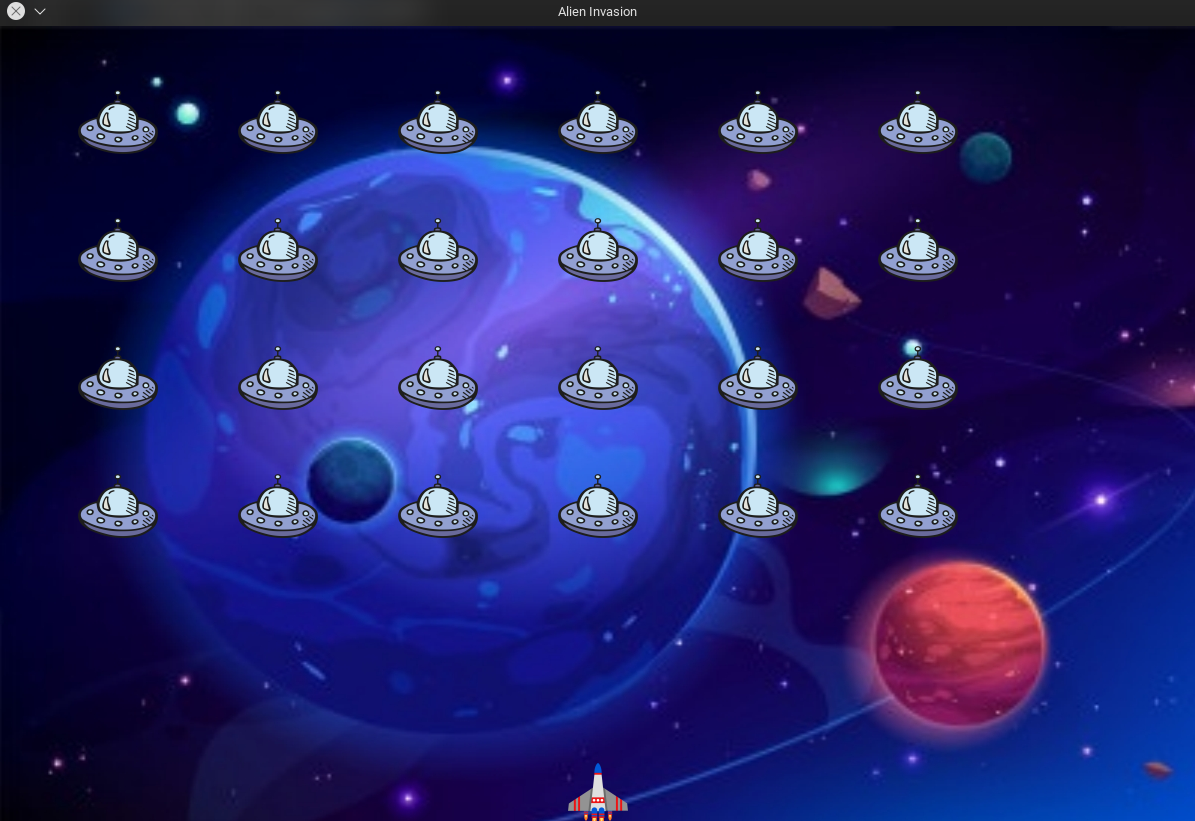